In [2]:
def solution(A, F, M):
    stack = []
    def backtrack(total, i):
        if total == 0 and i == 0:
            return stack[:]
        if total < 0 or i < 0:
            return
        
        avg = total//i
        for num in range(avg, 7):
            stack.append(num)
            res = backtrack(total - num, i - 1)
            if res:
                print(res)
                return res
            stack.pop()

    def is_possible(A, M, F):
        tot1 = sum(A)
        N = len(A) + F
        tot2 = M*N - tot1 
        if tot2 > 6 * F:
            return False
        res = backtrack(tot2, F)
        if res: 
            return res
        else: 
            return False

    return is_possible(A,M,F)


In [3]:
A = [1, 2, 3, 4]
F = 4
M = 6

solution(A,F,M)

False

In [4]:
def solution(A, X, Y, Z):
    station = [["X",X,0],["Y",Y,0],["Z",Z,0]]
    time = 0
    def is_possible_fill(car,station,now=False):
        for ele in station:
            if ele[1] >= car:
                if not now:
                    return True
                else:
                    if ele[2] == 0:
                        return True
        return False

    while A and is_possible_fill(A[0],station):
        i = 0
        while not is_possible_fill(A[0],station,now = True):
            time_to_wait = sorted([sublist[2] for sublist in station])[i]
            i += 1
            time += time_to_wait
            for ele in station:
                ele[2] -= time_to_wait
                ele[2] = max(0,ele[2])
        
        while A and  is_possible_fill(A[0],station,now = True):
            car = A.pop(0)
            for ele in station:
                if ele[1] >= car and ele[2] == 0:
                    ele[1] -= car
                    ele[2] += car
                    break
        
    if len(A) == 0:
        return time
    else:
        return -1

In [5]:
exemple = ([2, 8, 4, 3, 2], 7, 11, 3)
solution(*exemple)

8

In [6]:
X =[1, 4, 3, 2, 3]
Y =[4, 3, 1, 1, 2]
dico = {i:point for i,point in enumerate(zip(X,Y))}

print(dico)

{0: (1, 4), 1: (4, 3), 2: (3, 1), 3: (2, 1), 4: (3, 2)}


In [7]:
def is_outside(triplet,point):
        x, y = point
        x1, y1 = triplet[0]
        x2, y2 = triplet[1]
        x3, y3 = triplet[2]
        side_1 = (x - x2) * (y1 - y2) - (x1 - x2) * (y - y2)
        side_2 = (x - x3) * (y2 - y3) - (x2 - x3) * (y - y3)
        side_3 = (x - x1) * (y3 - y1) - (x3 - x1) * (y - y1)
        area = abs((x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2)))
        return not (side_1 < 0.0) == (side_2 < 0.0) == (side_3 < 0.0) and not area == 0

is_outside([dico[0],dico[1],dico[3]],dico[4])

True

In [8]:
X = (1,2)
print(*X,*X)

1 2 1 2


In [9]:
from itertools import combinations, permutations

def solution(X, Y):
    def area(x1,y1,x2,y2,x3,y3):
        return abs((x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2)))
    def is_outside(triplet,point):
        x, y = point
        x1, y1 = triplet[0]
        x2, y2 = triplet[1]
        x3, y3 = triplet[2]
        side_1 = (x - x2) * (y1 - y2) - (x1 - x2) * (y - y2)
        side_2 = (x - x3) * (y2 - y3) - (x2 - x3) * (y - y3)
        side_3 = (x - x1) * (y3 - y1) - (x3 - x1) * (y - y1)
        tri_area = abs((x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2)))

        if tri_area == 0:
            return False
        to_check = list(combinations([0,1,2],2))
        for a,b in to_check:
            x1,y1 = triplet[a]
            x2,y2 = triplet[b]
            if area(x1,y1,x2,y2,x,y) == 0 and min(x1,x2)<=x<=max(x1,x2) and min(y1,y2)<=y<=max(y1,y2):
                return False
        return not (side_1 < 0.0) == (side_2 < 0.0) == (side_3 < 0.0)

    dico = {i:point for i,point in enumerate(zip(X,Y))}
    
    triangles = list(combinations([i for i in range(len(X))], 3))    

    for triangle in triangles:
        p1, p2, p3 = triangle
        valid_triangle = True
        for point_index, point_coords in dico.items():
            if point_index not in triangle:  # skip the triangle points themselves
                if not is_outside([dico[p1], dico[p2], dico[p3]], point_coords):
                    valid_triangle = False
                    break
        if valid_triangle:
            return (dico[p1], dico[p2], dico[p3])

    return []

In [10]:
import matplotlib.pyplot as plt
from itertools import combinations

def plot_triangle(x_coords, y_coords):
    # Scatter plot all points
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='blue', label='Points')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Scatter Plot of Points')
    plt.grid(True)
        
    # Find a triangle without any other points inside it
    triangle = solution(x_coords,y_coords)
    
    if triangle:
        # Plot the triangle as a line plot
        triangle_x = [point[0] for point in triangle]
        triangle_y = [point[1] for point in triangle]
        triangle_x.append(triangle_x[0])  # closing the loop
        triangle_y.append(triangle_y[0])  # closing the loop
        
        plt.plot(triangle_x, triangle_y, color='red', marker='o', linestyle='-', linewidth=2, markersize=8)
        plt.scatter(triangle_x[:-1], triangle_y[:-1], color='red', label='Triangle Vertices')
        plt.legend()
    
    plt.show()

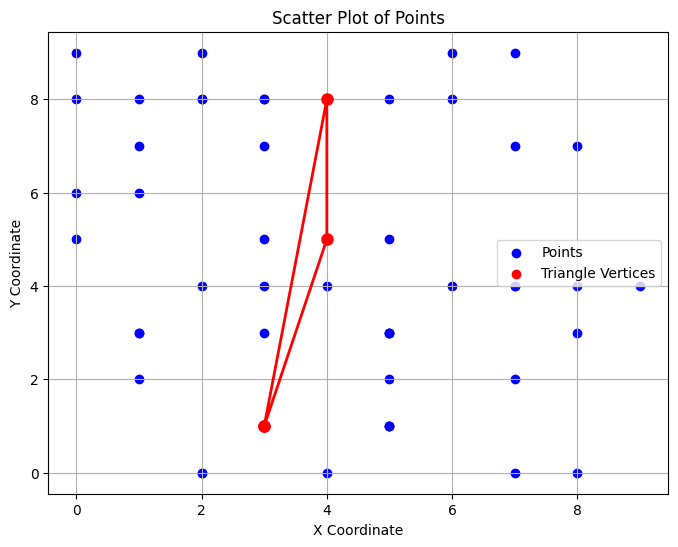

In [33]:
import numpy as np
def generate_random_points(num_points, range_min, range_max):
    x_coords = np.random.randint(range_min, range_max, num_points)
    y_coords = np.random.randint(range_min, range_max, num_points)
    return x_coords, y_coords

# Generate 10 random points with coordinates ranging from 0 to 10
x_coords, y_coords = generate_random_points(50, 0, 10)

plot_triangle(x_coords,y_coords)

In [12]:
print(x_coords)
print(y_coords)

[8 8 6 5 9 5 4 4 3 6 5 1 1 0 1 8 5 5 0 3 4 6 2 8 0 3 9 3 2 5 2 8 1 5 8 6 9
 7 7 2 5 4 7 5 7 0 6 4 1 9]
[6 7 5 7 5 9 7 3 0 7 7 4 0 6 6 6 9 4 9 1 5 4 9 7 2 0 3 5 2 9 6 9 2 6 3 6 3
 1 0 2 6 9 6 3 4 5 2 6 8 7]


In [13]:
from collections import Counter
def plot_points_with_duplicates(x_coords, y_coords):
    points = list(zip(x_coords, y_coords))
    point_counts = Counter(points)
    
    colors = {1: 'blue', 2: 'green', 3: 'red'}
    color_list = [colors[min(point_counts[p], 3)] for p in points]

    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, c=color_list, s=100, edgecolors='black', alpha=0.7)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Scatter Plot of Points with Duplicate Counts')
    plt.grid(True)
    plt.show()

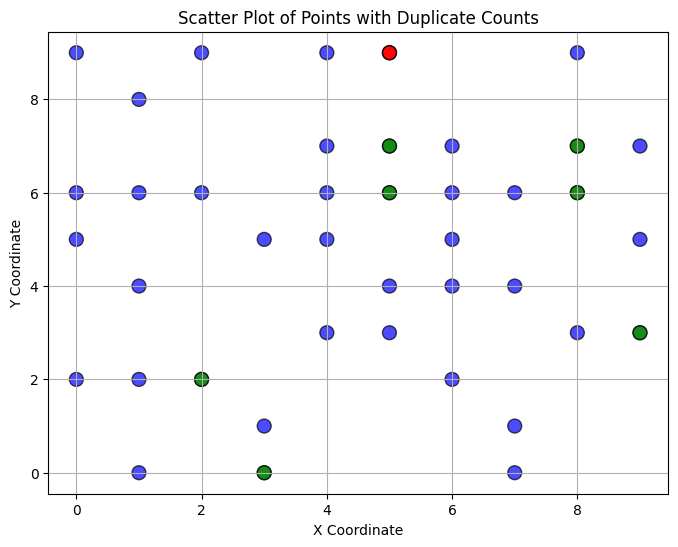

In [14]:
plot_points_with_duplicates(x_coords,y_coords)